# Lab 1 

Erika Falco 

March 9, 2024

## Part 1: The Gravitational Potential of the Earth

In [319]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.integrate import quad 

In [320]:
# Defining my constants up here 
G = 6.67*10**-11 #m^3/kg/s^2
R_Earth = 6378*10**3 #m -- Radius of Earth
d_Earth_Moon = 3.8*10**8 #m -- Earth to moon distance

M_Moon = 7.3*10**22 #kg
M_Earth = 5.9*10**24 #kg 

M_Apollo_cm = 5500 #kg

In [321]:
# Defining my GP function!
def GP(M, xM, yM, x, y):
    # r = distance between mass location and our reference point
    r = np.sqrt((xM-x)**2 + (yM-y)**2)

    # Time to rule out a singularity error 
    if np.isclose(xM, x) and np.isclose(yM, y):
        return np.nan
    
    else: 
        GP = -(G*M)/r
        return GP

GP_vec = np.vectorize(GP)

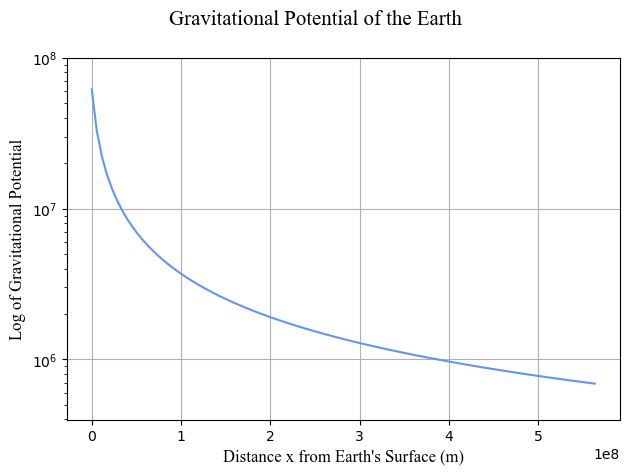

In [322]:
fig, ax = plt.subplots()

nx = 100
x = np.linspace(R_Earth, 1.5*d_Earth_Moon, nx)
y = np.zeros_like(x)

dim1_GP_Earth = np.abs(GP_vec(M_Earth, 0, 0, x, y))
x_from_surface = x-R_Earth

ax.plot(x_from_surface, dim1_GP_Earth, color = "cornflowerblue")
ax.set_yscale("log")

ax.set_xlabel("Distance x from Earth's Surface (m)", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel("Log of Gravitational Potential", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Potential of the Earth", fontsize = 15, fontname = "Times New Roman")

ax.grid()
ax.set_ylim(10**5.6, 10**8)

fig.tight_layout()

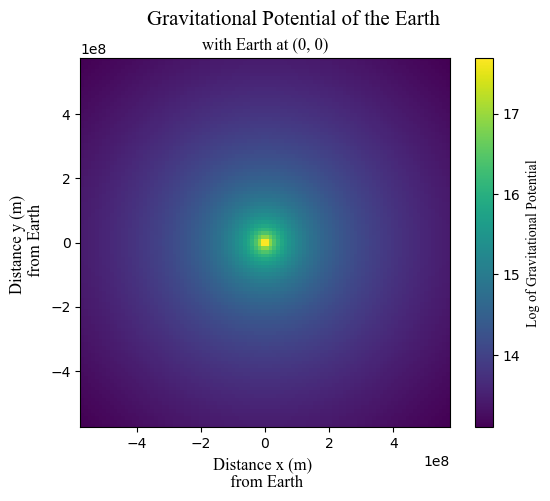

In [327]:
nx = 100
ny = 100
x = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, nx)
y = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, ny)

xmesh, ymesh = np.meshgrid(x, y)

dim2_GP_Earth = np.abs(GP_vec(M_Earth, 0, 0, xmesh, ymesh))

fig, ax = plt.subplots()
mesh = ax.pcolormesh(xmesh, ymesh, np.log(dim2_GP_Earth));
cbar = fig.colorbar(mesh)


cbar.set_label("Log of Gravitational Potential", fontname = "Times New Roman")
ax.set_xlabel("Distance x (m) \n from Earth", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel("Distance y (m) \n from Earth", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Potential of the Earth", fontsize = 15, fontname = "Times New Roman")
ax.set_title("with Earth at (0, 0)", fontsize = 12, fontname = "Times New Roman");

ax.set_aspect("equal")

## Part 2: The Gravitational Potential of the Earth-Moon System

268700576.851, 268700576.851


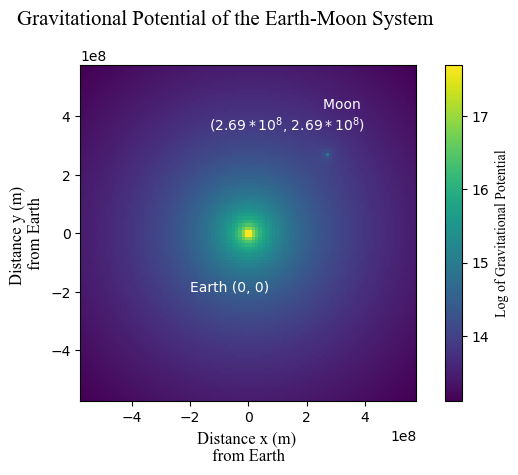

In [350]:
x = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, nx)
y = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, ny)

xmesh, ymesh = np.meshgrid(x, y)

x_moon = d_Earth_Moon/np.sqrt(2) #m
y_moon = d_Earth_Moon/np.sqrt(2) #m

x_earth = 0 #m
y_earth = 0 #m

GP_Earth = np.abs(GP_vec(M_Earth, x_earth, y_earth, xmesh, ymesh))
GP_Moon = np.abs(GP_vec(M_Moon, x_moon, y_moon, xmesh, ymesh))

GP_tot = GP_Earth + GP_Moon 

fig, ax = plt.subplots()
mesh2 = ax.pcolormesh(xmesh, ymesh, np.log(GP_tot))
cbar = fig.colorbar(mesh2)
cbar.set_label("Log of Gravitational Potential", fontname = "Times New Roman")
ax.set_xlabel("Distance x (m) \nfrom Earth", fontsize =12, fontname = "Times New Roman")
ax.set_ylabel("Distance y (m) \nfrom Earth", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Potential of the Earth-Moon System", fontsize = 15, fontname = "Times New Roman", ha = "center")
#ax.set_title("With Earth at (0, 0)", fontsize = 12, fontname = "Times New Roman");
ax.text(4*10**8, 4*10**8, "Moon \n($2.69*10^8$, $2.69*10^8$)", ha = "right", color = "white", va = "center")
ax.text(-2*10**8, -2*10**8, "Earth (0, 0)", ha = "left", color = "white")

print(f"{x_moon:.3f}, {y_moon:.3f}")
ax.set_aspect("equal")
fig.tight_layout()

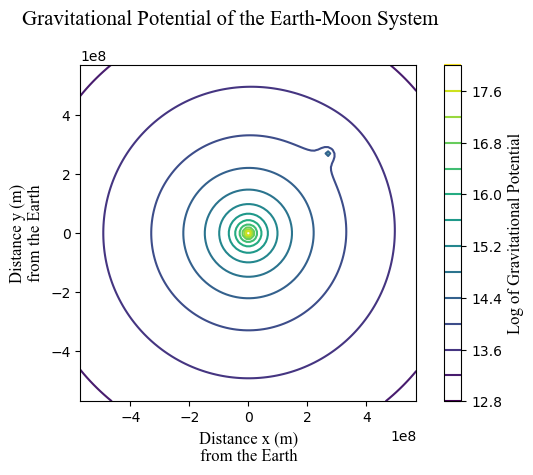

In [351]:
fig, ax = plt.subplots()
contour = ax.contour(xmesh, ymesh, np.log(GP_tot), 12)
cbar = fig.colorbar(contour)
cbar.set_label("Log of Gravitational Potential", fontsize = 12, fontname = "Times New Roman")
ax.set_xlabel("Distance x (m)\nfrom the Earth", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel("Distance y (m)\nfrom the Earth", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Potential of the Earth-Moon System", fontsize = 15, ha = "center", fontname = "Times New Roman")

ax.set_aspect("equal")
#fig.text(0.265, -0.05, "Earth at $(0, 0)$\nMoon at ($2.69*10^8$, $2.69*10^8$)", fontname = "Times New Roman")

fig.tight_layout()

## Part 3: The Gravitational Force Field of the Earth-Moon System

In [341]:
def Fg(M1, m2, x1, y1, x2, y2):
    rx = x2 - x1
    ry = y2 - y1
    r = np.sqrt(rx**2 + ry**2) #Magnitude of the distance vector r 
    
    if np.isclose(x1, x2) and np.isclose(y1, y2):
        Fx = np.nan
        Fy = np.nan
    
    else:
        r_vec = np.array([rx, ry]) #r vector with x and y distances as components 
        r_hat_vec = r_vec/np.linalg.norm(r_vec) #unit vector r hat 
        
        Fx = r_hat_vec[0]*(-G*M1*m2)/(r**2) #Multiplying the x component of the unit vector by our total force
        Fy = r_hat_vec[1]*(-G*M1*m2)/(r**2) #Multiplying the y component of the unit vector by our total force
        
        return Fx, Fy

nx = 100
ny = 100
x = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, nx)
y = np.linspace(-1.5*d_Earth_Moon, 1.5*d_Earth_Moon, ny)

xmesh, ymesh = np.meshgrid(x, y)

x_moon = d_Earth_Moon/np.sqrt(2) #m
y_moon = d_Earth_Moon/np.sqrt(2) #m

x_earth = 0 #m
y_earth = 0 #m

Fx = np.zeros((ny, nx))
Fy = np.zeros((ny, nx))

for y in range(ny): # visit all y points (all rows)
    for x in range(nx): # visit all x points (all columns)
        
        Fg_earth_x, Fg_earth_y = Fg(M_Earth, M_Apollo_cm, x_earth, y_earth, xmesh[y, x], ymesh[y, x]) # y value controls the ROW and x controls the COLUMN: IMPORTANT!
        Fg_moon_x, Fg_moon_y = Fg(M_Moon, M_Apollo_cm, x_moon, y_moon, xmesh[y, x], ymesh[y, x])
        
        # now, we update our container 
        Fx[y, x] += (Fg_earth_x + Fg_moon_x)
        Fy[y, x] += (Fg_earth_y + Fg_moon_y)

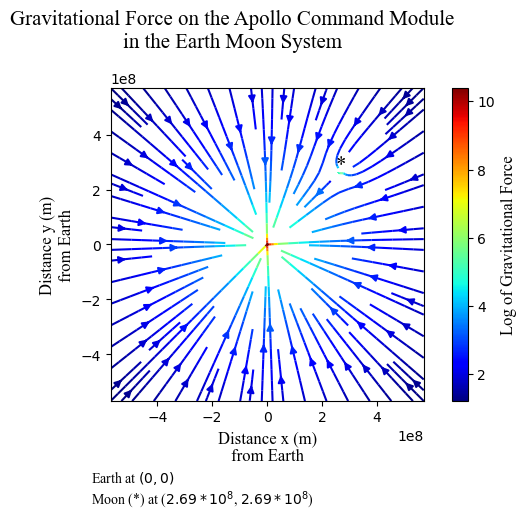

In [342]:
fig, ax = plt.subplots()

import matplotlib.cm as cm
colors = np.log(np.hypot(Fx, Fy))

stream = ax.streamplot(xmesh, ymesh, Fx, Fy, color = colors, cmap = "jet");
ax.text(x_moon, y_moon, "*", fontsize = 15, ha = "center", fontname = "Times New Roman")

cbar = fig.colorbar(stream.lines)
cbar.set_label("Log of Gravitational Force", fontsize = 12, fontname = "Times New Roman")
ax.set_xlabel("Distance x (m)\nfrom Earth", fontsize = 12, fontname = "Times New Roman")
ax.set_ylabel("Distance y (m)\nfrom Earth", fontsize = 12, fontname = "Times New Roman")
fig.suptitle("Gravitational Force on the Apollo Command Module\nin the Earth Moon System", fontsize =15, fontname = "Times New Roman")

fig.text(0.28, -0.05, "Earth at $(0, 0)$\nMoon (*) at ($2.69*10^8$, $2.69*10^8$)", fontname = "Times New Roman")
ax.set_aspect("equal")

fig.tight_layout()

# Part 4: Altitude of the Saturn V Rocket

In [352]:
# Calculate the burn time T for the first stage of the new Saturn V rocket
mf = 7.5*10**5 #kg
mo = 2.8*10**6 #kg

ve = 2.4*10**3 #m/s
g = 9.81 #m/s**2
deriv_m = 1.3*10**4 #kg/s

In [353]:
T = (mo - mf)/deriv_m
print(f"Burn time: {T:.3f} seconds")

Burn time: 157.692 seconds


In [354]:
def dv(t):
    dv = ve*np.log(mo/(mo - deriv_m*t)) - g*t
    if dv <= 0:
        return 0
    else: 
        return dv

In [355]:
h, unc_h = quad(dv, 0, T)

print(f"Altitude = {h:.3f} m +/- {unc_h:10.4e} m")

Altitude = 74093.980 m +/- 5.8488e-08 m
